# <span style = "color:#7a0264;font-family:helvetica"> DBSCAN - Density Based Spatial Clustering of applications

### <span style = "color:#7a0264;font-family:helvetica"> DBSCAN - Density-based spatail clustering of applications with noise is a powerfull technique which can be sued for clustering and outlier detection

## <span style = "color:#7a0264;font-family:helvetica"> Section Overview:
* DBSCAN intuition 
* DBSCAN Vs K-means clustering
* DBSCAN Hyperparamter theory
* DBSCAN hyperparameter Coding

## <span style = "color:#7a0264;font-family:helvetica"> DBSCAN Throey and Intuition

### <span style = "color:#7a0264;font-family:helvetica"> DBSCAN stands for Density Based Spatial Clustering of Application with Noise.

### <span style = "color:#7a0264;font-family:helvetica"> Questions to consider:
* How does DBSCAN work?
* Advantages and Disadvantages of DBSCAN
* How does it deal with outliers and noise?

### <span style = "color:#7a0264;font-family:helvetica"> There are some key ideas with DBSCAN:
* DBSCAN focuses on using density of points as its amil focus for assigning cluster labels.
* This creates the ability to find cluster segmentations that other algorithms have dificulty with.

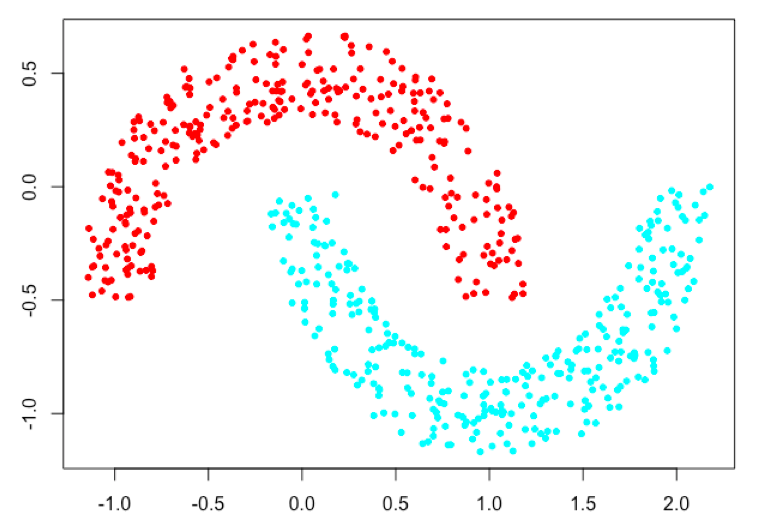

#### <span style = "color:#7a0264;font-family:helvetica"> The above plot is from moon dataset

### <span style = "color:#7a0264;font-family:helvetica"> It has two cresent moon's one is concave and another convex

#### <span style = "color:#7a0264;font-family:helvetica"> Typically if we want to do clustering with this dataset many clustering algorithms will have issues with it.

#### <span style = "color:#7a0264;font-family:helvetica"> We can seee above there are two moon shaped clusters and distance based clusters will have problem with this.

#### <span style = "color:#7a0264;font-family:helvetica"> 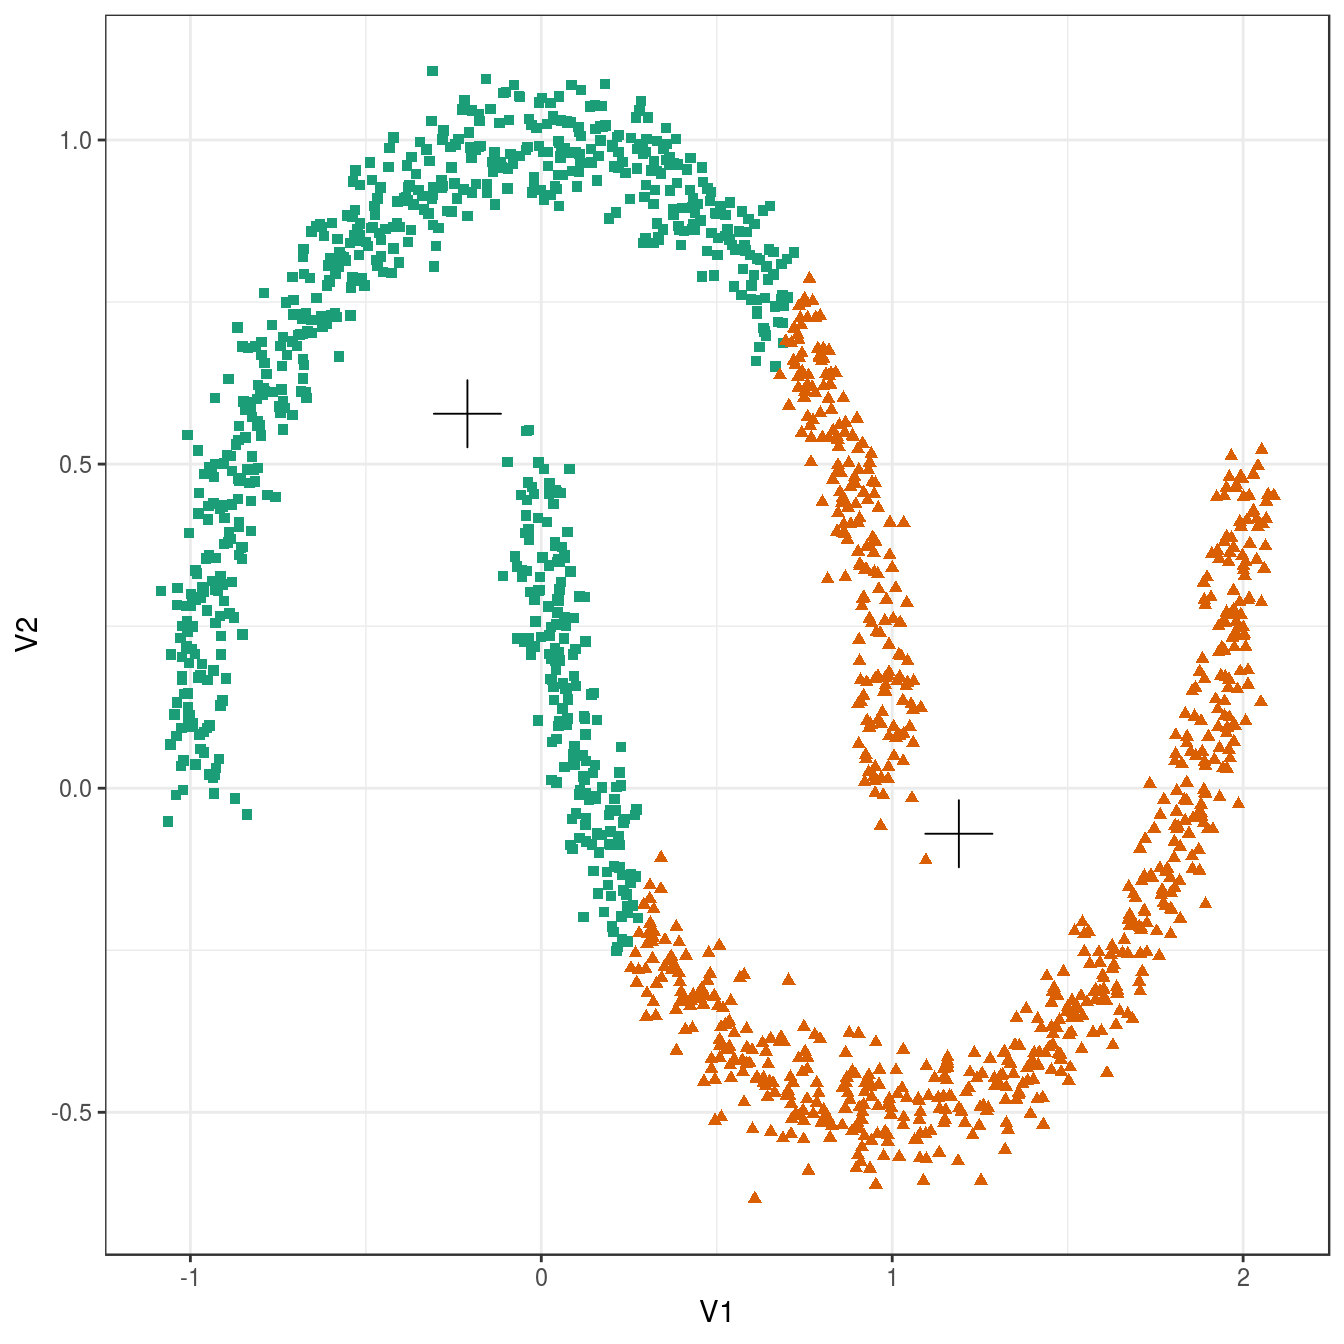

## <span style = "color:#7a0264;font-family:helvetica"> IF K-Means applied on the above data, certainly it is not correct clustering. K-Means doesn't see these moon shaped curves as it works on the basis of distance

### <span style = "color:#7a0264;font-family:helvetica"> On the other hand DBSCAN can do it by correctly with right hyperparameter choices.

### <span style = "color:#7a0264;font-family:helvetica"> DBSCAN iterates thourgh points and uses two key hyperparameters(epsilon and minimum number of points) to assign cluster labels.</span>

### <span style = "color:#7a0264;font-family:helvetica"> Unlike K-Means, it focuses on density as the mail factor for cluster assignment of points instead of distance form one point to another

## <span style = "color:#7a0264;font-family:helvetica"> DBSCAN Key Hyperparameter:
* Epsilon:
    * Distance extended from a point
* Minimim Number of Points:
    * Minimum number of points in an epsilon distance.

### <span style = "color:#7a0264;font-family:helvetica"> DBSCAN Point Types:
* Core
* Border
* Ourlier

### <span style = "color:#7a0264;font-family:helvetica">DBSCAN Point Type - Core

### <span style = "color:#7a0264;font-family:helvetica"> DBSCAN starts off with randomly choosing a points and checking what kind of point type it is.
* Let's first define a core point and will began with assuming epsilon of 1.(epsilon is distance extended form the point) and then minimum number of points within in epsilon neighborhood to identify a point a s core point.
* And That leads us to the defination of Core:
    * Point with minimum number of points with in epsilon range.

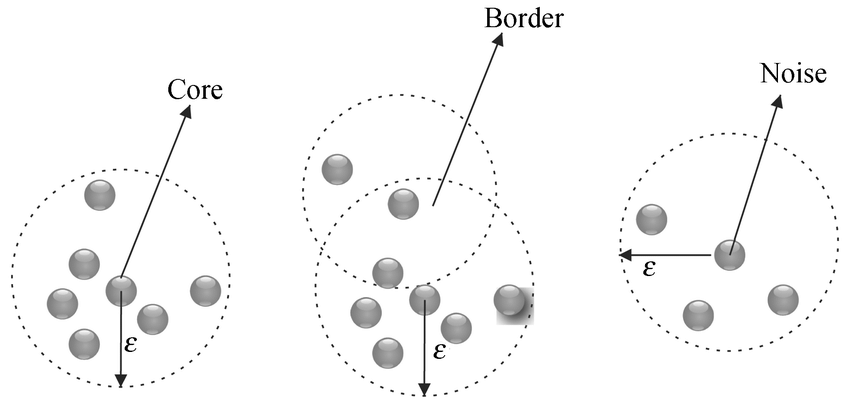

### <span style = "color:#7a0264;font-family:helvetica"> DBSCAN Point types: Border

### <span style = "color:#7a0264;font-family:helvetica">A border point is a point in epsilon range of core point but doesn't contain minimum nunber of points in its own range like figure 2.

#### <span style = "color:#7a0264;font-family:helvetica"> Essentially this means that this point will be at the border of a cluster

### <span style = "color:#7a0264;font-family:helvetica"> DBSCAN Point types: Outlier

### <span style = "color:#7a0264;font-family:helvetica"> Outlier points are those points which can not "reached" by points in a cluster assignment.Which means DBSCAN automatically detecting outliers for us.

## <span style = "color:#7a0264;font-family:helvetica"> DBSCAN Procedure:
* Pick a random point not yet assigned.
* Determine the point type.
* Once Core Point has been found, add all directly reachable points to the same clusrer as core.
* Repeat until all points have been assigned to a cluster or as an outlier.

### <span style = "color:#7a0264;font-family:helvetica"> We can fo to this link and check how changing the epsilon and minim number of points changes the cluster https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

## <span style = "color:#7a0264;font-family:helvetica"> DBSCAN Vs K-Means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
blobs = pd.read_csv("cluster_blobs.csv")

In [4]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


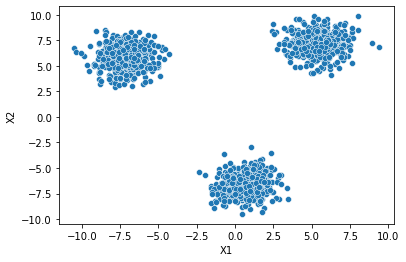

In [6]:
sns.scatterplot(data = blobs, x = 'X1', y = "X2");

In [7]:
moons = pd.read_csv("cluster_moons.csv")

In [8]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


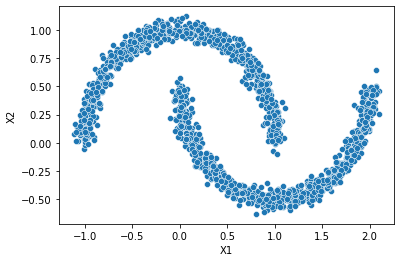

In [10]:
sns.scatterplot(data = moons, x = "X1", y = "X2");

In [11]:
circles = pd.read_csv("cluster_circles.csv")

In [12]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


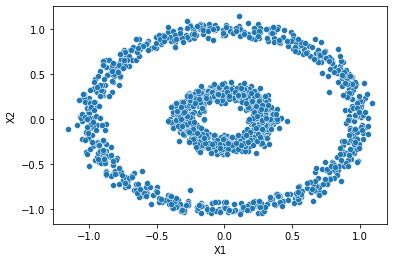

In [14]:
sns.scatterplot(data = circles, x = "X1", y = "X2");

In [15]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data = data, x = "X1", y = "X2", hue = labels, palette="Set1")

In [16]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters=3)

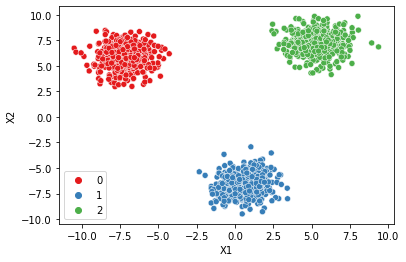

In [18]:
display_categories(model, blobs)

In [19]:
model = KMeans(n_clusters=2)

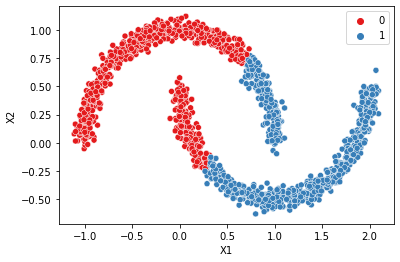

In [20]:
display_categories(model, moons)

### <span style = "color:#7a0264;font-family:helvetica"> As K-Means clustering works on distance based metric and in this data it unbale to define the pattern

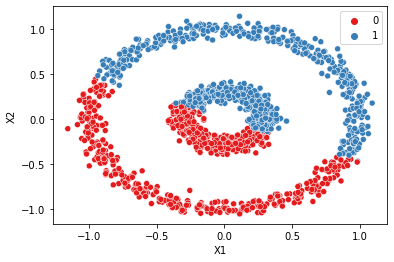

In [21]:
display_categories(model, circles)

### <span style = "color:#7a0264;font-family:helvetica"> Now see how DBSCAN works with these kinds of data

In [22]:
from sklearn.cluster import DBSCAN

#### <span style = "color:#7a0264;font-family:helvetica">class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator) DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

### <span style = "color:#7a0264;font-family:helvetica"> Here two parameters are important on is eps(epsilon) and another is min_samples

In [25]:
model = DBSCAN()

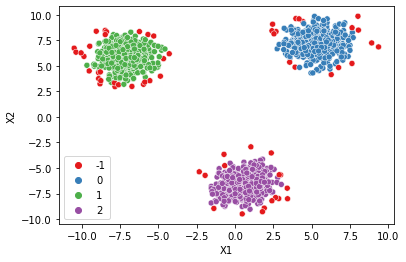

In [26]:
display_categories(model, blobs)

### <span style = "color:#7a0264;font-family:helvetica"> DBSCAN actually determines that data has three custers just like K-Means, but really good part with DBSCAN that it highlight Outlier as well by giving them a label of -1 based on epsilon and minimum number of points

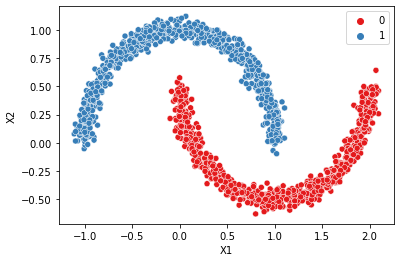

In [28]:
model = DBSCAN(eps = 0.15)
display_categories(model, moons)

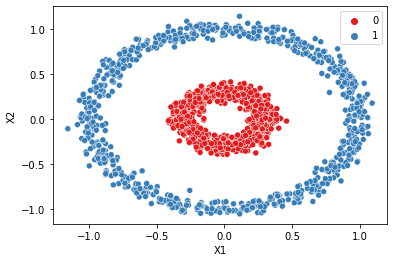

In [29]:
display_categories(model, circles)

# <span style = "color:#7a0264;font-family:helvetica"> DBSCAN - Hyperparameter Theory

### <span style = "color:#7a0264;font-family:helvetica"> As we've discussed already, there are two key hyperparameters to consider for DBSCAN:
* Epsilon:
    * Distance extended from a point to search for Min. Number of points.
* Min. Number of Points:
    * Min, Number of Points within Epsilon distance to be a core point.

### <span style = "color:#7a0264;font-family:helvetica"> Adjusting these two hyperparameters usually have two outcomes:
* Changing number of clusters.
* Changing what is an outlier point

### <span style = "color:#7a0264;font-family:helvetica"> Epsilon Intuition:
* Increasing epsilon allows more points to be core points which also results in more border points and less outlier points.
 
* Imagine a huge epsilon, all points would be the neigborhood and classfied as the same cluster!
    
* Decreasing epsilon causes more points not be in range of each other, creating more unique clusters.
    
* Imagine a tiny epsilon, the range would not extend far out enough to come into contact with any other points!

### <span style = "color:#7a0264;font-family:helvetica"> Methods for finding and epsilon value:
* Typically we run some sort of Elbow or Knee Method i.e. plotting multiple values of  agains some sort of distinct measure.
* Run multiple DBSCAN models varying epsilon and measure:
    * Number of Clusters
    * Number of Outliers
    * Percentage of Outliers
    

### <span style = "color:#7a0264;font-family:helvetica"> Minimum Number of Samples/Points:
* Number of samples in a neighborhood for a point to be considered as $\large{core}$ point (Inclusing the point itself)

### <span style = "color:#7a0264;font-family:helvetica"> Min. Number of Samples Intuition:
* Increasing to a larger number of samples needed to be considered a core point, causes more points to be considered unique outliers
* Imagine if min, number of samples was close to total number of points avaiable, them very likely all points would become outliers.

### <span style = "color:#7a0264;font-family:helvetica"> Choosing Min. Number of Samples:
* Essentially same as epsilon
* We will test multiple potential values and chart against number of outliers labeled.


### <span style = "color:red;font-family:helvetica"> Min. Number of Samples Impotant Note:
* Useful to increase to create potential new small clusters, instead of complete outliers.

# <span style = "color:#7a0264;font-family:helvetica"> DBSCAN - Hyperparameter Tuning Method & Search With Coding

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
two_blobs = pd.read_csv("cluster_two_blobs.csv")

In [32]:
two_blobs_outliers = pd.read_csv("cluster_two_blobs_outliers.csv")

<AxesSubplot:xlabel='X1', ylabel='X2'>

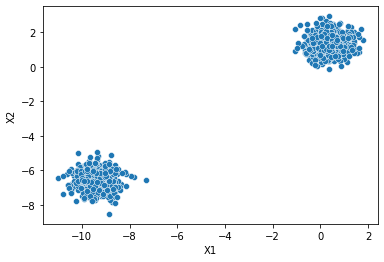

In [33]:
sns.scatterplot(data = two_blobs, x = "X1",y = 'X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

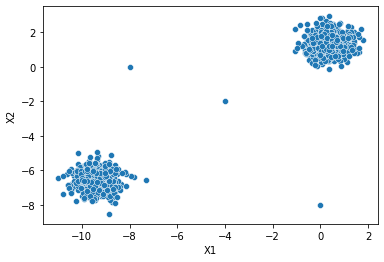

In [34]:
sns.scatterplot(data = two_blobs_outliers, x = "X1",y = 'X2')

In [42]:
def display_Categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data = data, x = "X1", y = "X2", hue = labels, palette="Set1")

In [43]:
from sklearn.cluster import DBSCAN

In [44]:
dbscan = DBSCAN()

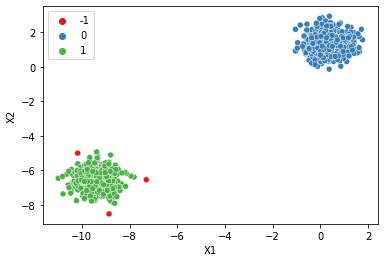

In [45]:
display_Categories(dbscan, two_blobs  )

### <span style = "color:#7a0264;font-family:helvetica"> Just with the default values we can see is it has identified outliers as well

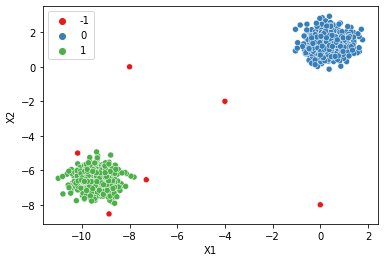

In [46]:
display_Categories(dbscan, two_blobs_outliers)

### <span style = "color:#7a0264;font-family:helvetica"> Let's explore how epsilon effect the results here

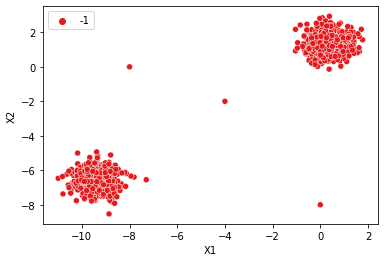

In [47]:
dbscan = DBSCAN(eps= 0.001)
display_Categories(dbscan,two_blobs_outliers)

#### <span style = "color:#7a0264;font-family:helvetica"> So When we are reducing the epsilon value we can see everything here is an outlier

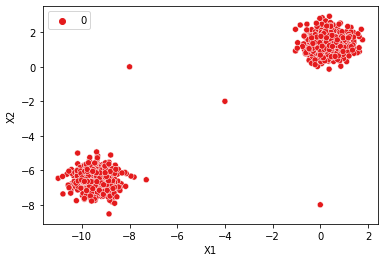

In [48]:
dbscan = DBSCAN(eps= 10)
display_Categories(dbscan,two_blobs_outliers)

### <span style = "color:#7a0264;font-family:helvetica"> Here when we increase the value of epsilon two much, it making everything in one cluster

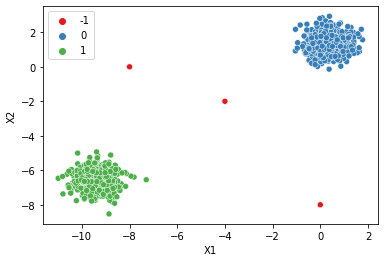

In [49]:
dbscan = DBSCAN(eps= 1)
display_Categories(dbscan,two_blobs_outliers)

### <span style = "color:#7a0264;font-family:helvetica"> Here with espilon being 1 it brings the desired results

In [52]:
np.sum(dbscan.labels_ == -1)

3

#### <span style = "color:#7a0264;font-family:helvetica"> This sort of calculation we can use in deciding upon the espilon value, and if we want to make in percentage

In [54]:
100* np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)

0.29910269192422734

In [55]:
len(dbscan.labels_)

1003

### <span style = "color:#7a0264;font-family:helvetica"> We can create a loop to make elbow method to decide upon epsilon value

In [62]:
outlier_percent = []
number_of_outlier = []

for eps in np.linspace(0.001, 7, 200):
    dbscan = DBSCAN(eps= eps)
    dbscan.fit(two_blobs_outliers)
    
    number_of_outlier.append(np.sum(dbscan.labels_ == -1))
    
    percen_ourlier = 100* np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)
    
    outlier_percent.append(percen_ourlier)

<AxesSubplot:>

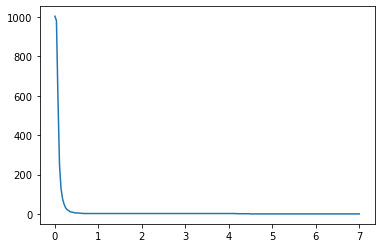

In [64]:
sns.lineplot(x =np.linspace(0.001, 7, 200), y = number_of_outlier)

### <span style = "color:#7a0264;font-family:helvetica"> We can zoom in to the points where we are interested in 

(0.0, 2.0)

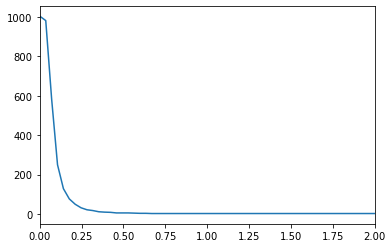

In [65]:
sns.lineplot(x = np.linspace(0.001, 7, 200), y = number_of_outlier)
plt.xlim(0,2)

Text(0, 0.5, 'Percent of Points classifiedd as outliers')

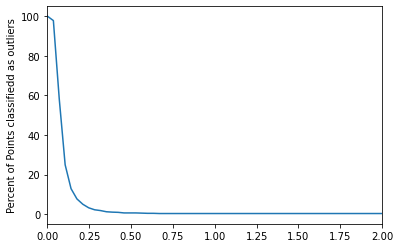

In [67]:
sns.lineplot(x = np.linspace(0.001, 7, 200), y = outlier_percent)
plt.xlim(0,2)
plt.ylabel("Percent of Points classifiedd as outliers")

### <span style = "color:#7a0264;font-family:helvetica"> we can check with percentage of outliers as well.We know we should get thhree outliers we can discover this by following

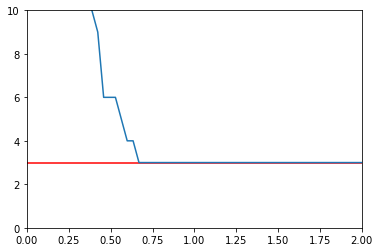

In [69]:
sns.lineplot(x = np.linspace(0.001, 7, 200), y = number_of_outlier)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y = 3, xmin=0, xmax=2, color = 'red')

### <span style = "color:#7a0264;font-family:helvetica"> So we can see somewhere between 0.75 and 1 it start finding outliers less than 3. We can confirm this by following

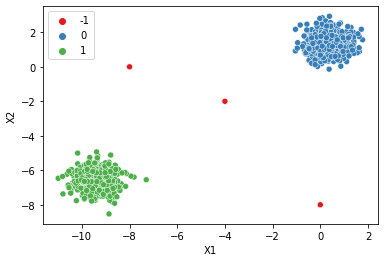

In [70]:
dbscan = DBSCAN(eps= 0.75)
display_Categories(dbscan,two_blobs_outliers)

### <span style = "color:#7a0264;font-family:helvetica"> Quite a similar idea will be followed for finding out min. number of samples

In [71]:
outlier_percent = []
number_of_outlier = []

for n in np.arange(1,100):
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    number_of_outlier.append(np.sum(dbscan.labels_ == -1))
    
    percen_ourlier = 100* np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)
    
    outlier_percent.append(percen_ourlier)

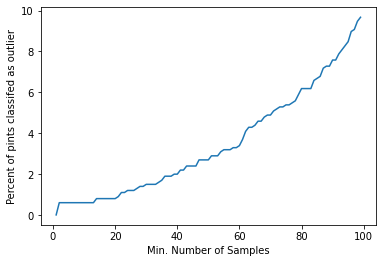

In [74]:
sns.lineplot(x = np.arange(1,100), y = outlier_percent)
plt.xlabel("Min. Number of Samples")
plt.ylabel("Percent of pints classifed as outlier");

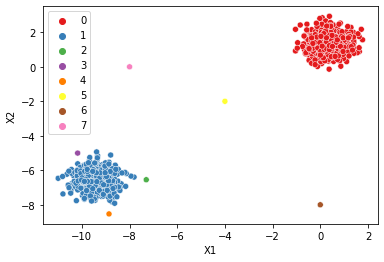

In [76]:
dbscan = DBSCAN(min_samples=1)
display_Categories(dbscan,two_blobs_outliers)

### <span style = "color:#7a0264;font-family:helvetica"> If we set min_samples quite low then every point become a cluster and see even identified before as a outlier now , they are cluster of their own

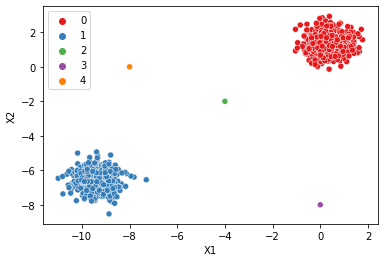

In [78]:
dbscan = DBSCAN(min_samples=1, eps = 0.75)
display_Categories(dbscan,two_blobs_outliers)

### <span style = "color:#7a0264;font-family:helvetica"> And once we increase samples

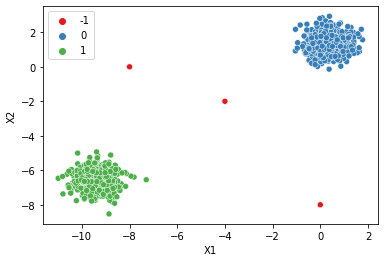

In [79]:
dbscan = DBSCAN(min_samples=3, eps = 0.75)
display_Categories(dbscan,two_blobs_outliers)

### <span style = "color:#7a0264;font-family:helvetica">SUggestion for Min. Number for samples: The good starting point for min. number of samples in can be 2 times the number of dimentions of the data

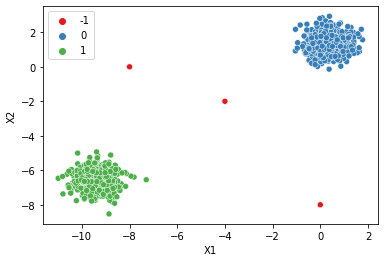

In [80]:
num_dim = two_blobs_outliers.shape[1]
dbscan = DBSCAN(min_samples=2*num_dim, eps = 0.75)
display_Categories(dbscan,two_blobs_outliers)

# <span style = "color:#7a0264;font-family:helvetica"> DBSCAN -Project exercise

# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv("wholesome_customers_data.csv")

In [86]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## <span style = "color:#7a0264;font-family:helvetica"> EDA

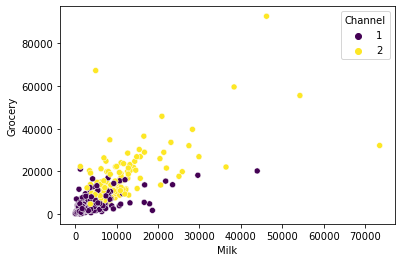

In [90]:
sns.scatterplot(data = df, x ="Milk" , y = "Grocery",hue="Channel" , palette="viridis" );

###  scatterplot showing the relation between MILK and GROCERY spending,by Channel column

<AxesSubplot:xlabel='Milk', ylabel='Count'>

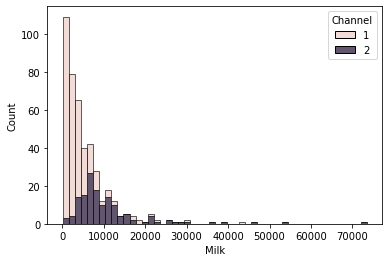

In [97]:
sns.histplot(data = df, x = "Milk", hue = "Channel",multiple="stack" )

Histogram of MILK spending,by Channel

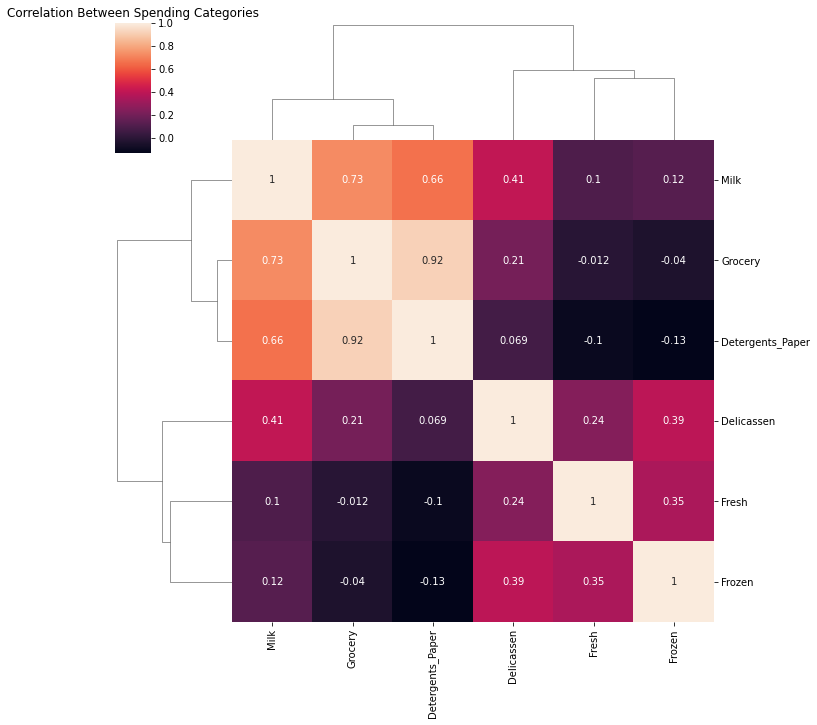

In [105]:
sns.clustermap(df.drop(["Channel", "Region"], axis = 1).corr(), annot = True)
plt.title("Correlation Between Spending Categories");

### Annotated clustermap of the correlations between spending on different cateogires

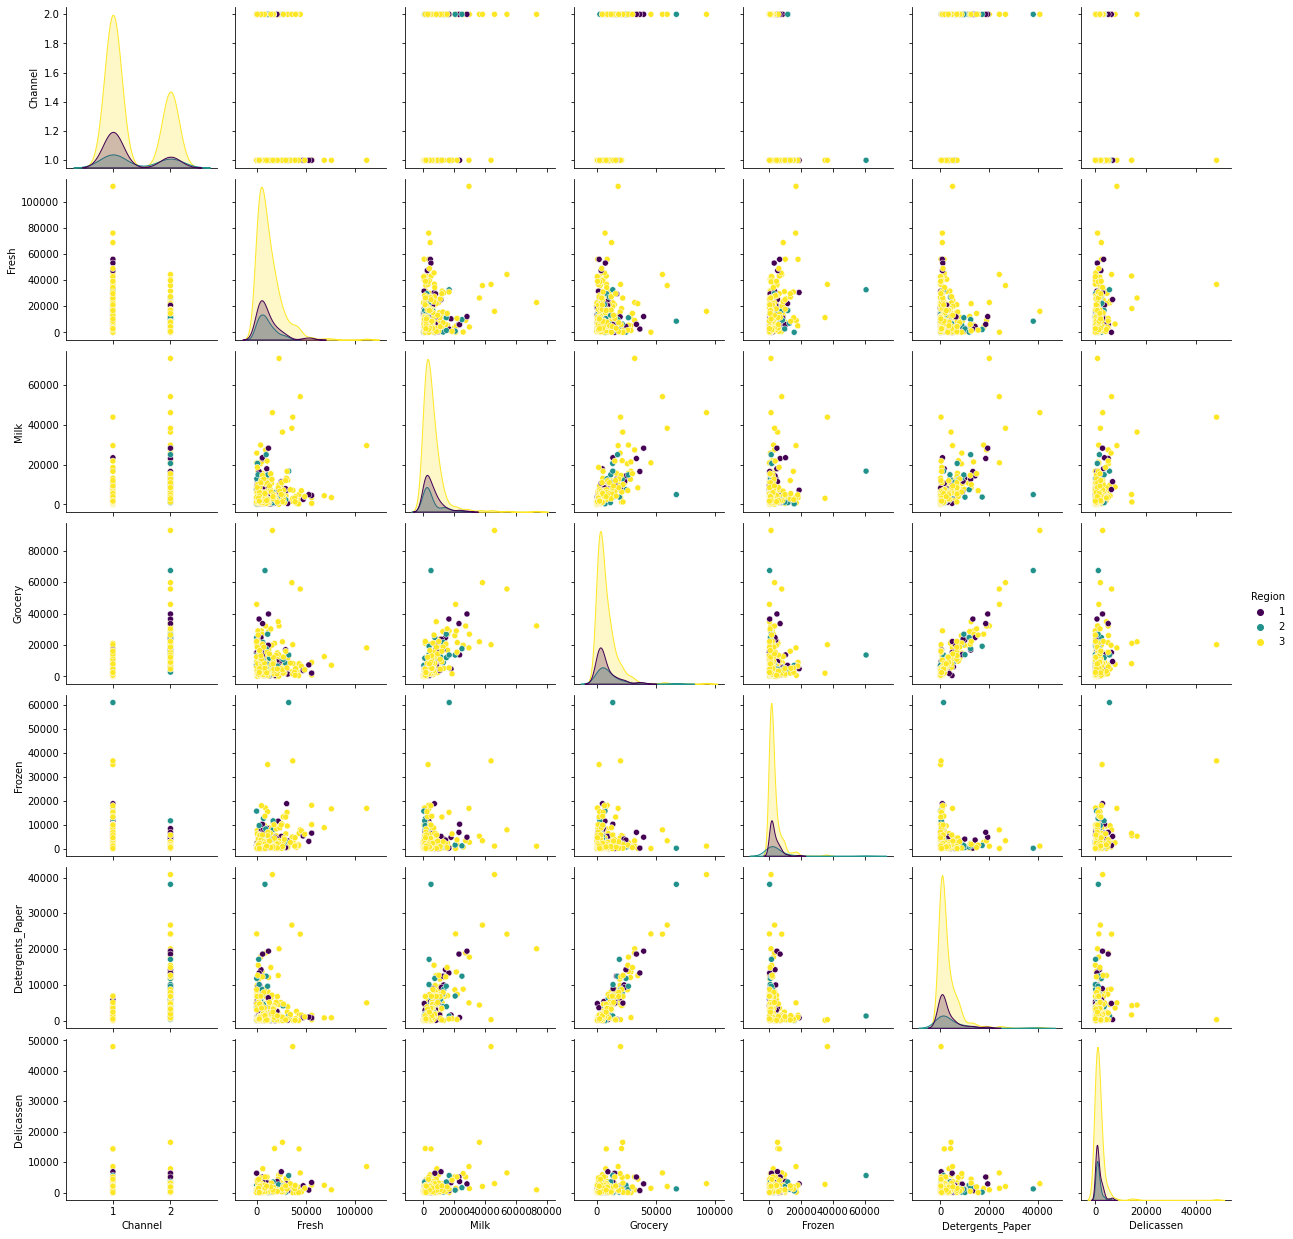

In [112]:

sns.pairplot(data = df , hue="Region", palette="viridis")

### PairPlot of the dataframe, colored by Region

### Starting with Model

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

In [115]:
scaled_data = scaler.fit_transform(df)

In [116]:
scaled_data

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

Using DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:

    np.linspace(0.001,3,50)

In [119]:
from sklearn.cluster import DBSCAN

In [123]:
outlier_percentage = []
number_of_outlier = []
number_of_Features = np.sum(df.shape[1])

for eps in np.linspace(0.001,3,50):
    dbscan = DBSCAN(eps = eps,min_samples= number_of_Features)
    dbscan.fit(scaled_data)
    number_of_outlier.append(np.sum(dbscan.labels_ == -1))
    pertange = 100 * (np.sum(dbscan.labels_ == -1)/len(dbscan.labels_))
    outlier_percentage.append(pertange)


<AxesSubplot:>

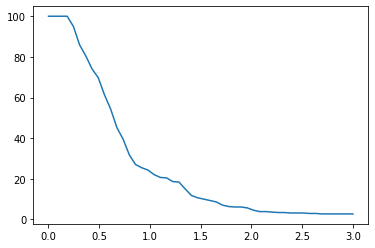

In [124]:
sns.lineplot(x =np.linspace(0.001,3,50), y =outlier_percentage  )

### line plot of the percentage of outlier points versus the epsilon value choice

In [127]:
model = DBSCAN(eps= 2)

In [128]:
model.fit(scaled_data)

DBSCAN(eps=2)

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

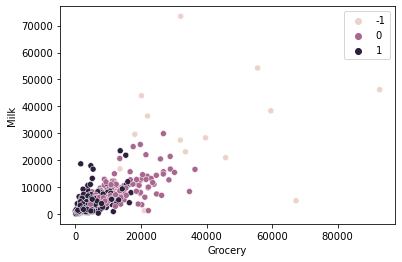

In [130]:
sns.scatterplot(data = df, x = "Grocery", y = "Milk", hue = model.labels_)

### scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

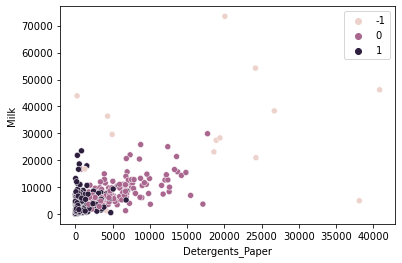

In [132]:
sns.scatterplot(data = df, x = "Detergents_Paper", y = "Milk", hue = model.labels_)

In [133]:
df["labels"] = model.labels_

In [135]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


### Comparing the statistical mean of the clusters and outliers for the spending amounts on the categories below

In [154]:
cat_means = df.groupby("labels")[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].mean()

In [155]:
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


 ### Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.

In [156]:
from sklearn.preprocessing import MinMaxScaler

In [157]:
scaler_mm = MinMaxScaler()

In [158]:
scaled_mm_data = scaler_mm.fit_transform(cat_means)

In [159]:
scaled_mm_data

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [0.        , 0.23929169, 0.34101071, 0.        , 0.38075797,
        0.05993767],
       [0.20318831, 0.        , 0.        , 0.1567934 , 0.        ,
        0.        ]])

In [161]:
scaled_cat_data = pd.DataFrame(data = scaled_mm_data, index= cat_means.index,columns=cat_means.columns)

In [162]:
scaled_cat_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.239292,0.341011,0.000000,0.380758,0.059938
1,0.203188,0.000000,0.000000,0.156793,0.000000,0.000000


<AxesSubplot:ylabel='labels'>

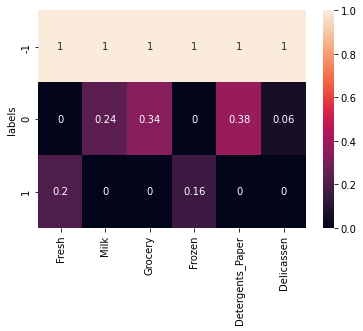

In [163]:
sns.heatmap(scaled_cat_data, annot = True)

<AxesSubplot:ylabel='labels'>

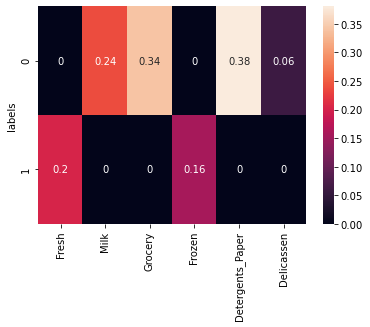

In [165]:
sns.heatmap(scaled_cat_data.loc[[0,1]],annot = True)

## What spending category were the two clusters most different in?

### Almost all the categories has outliers and Milk and Detergent_Papers are two cluster where most is different